In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, MinMaxScaler, Normalizer, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_auc_score,roc_curve, classification_report
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn import tree 

from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Data Importing**

In [13]:
data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Veri-Bilimi-Bootcamp/Odevler/HW_Data_Set.xlsx")
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


## 1. **Data Statistics**

In [14]:
data.shape

(6167, 136)

### **1.1. Describe Dataset**

In [15]:
describe(data)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
count,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,...,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000
mean,-0.803146,-0.803470,48.388890,48.289282,0.099609,49.488867,-18.497518,11.771485,11.773550,11.773392,11.772164,11.756105,-0.268040,-0.723528,-0.444300,-25.970975,24.945192,0.002215,-0.002264,-0.000024,1.048592,0.913289,1.596028,1.102192,-0.276875,-3.087097,-5.202559,-6.191402,-8.376898,-12.298849,-0.142528,3.493271,-1.071197,0.041349,0.099724,0.198962,0.296579,0.342792,0.377493,0.460353,...,-0.000032,-0.422692,95.137008,1.152460,-0.674508,80.624985,0.980187,68.391460,-0.000074,24.704677,-0.167167,15.757278,-0.000022,0.127180,-0.014782,-0.000006,-0.006399,1.210483,-0.000001,0.259444,0.145690,-49.281281,0.508078,-0.011978,-0.000038,0.000004,-0.000004,0.985568,0.099238,0.239987,0.000224,28.529204,-8.554792,-28.166694,0.490297,0.498188,0.490174,-0.057102,-2.906358,-3.315072
std,23.624403,23.624144,36.388526,36.478009,60.414625,12.198722,68.281120,6.803997,5.786089,4.970499,4.488712,2.707619,8.923976,19.028597,11.028702,27.775290,24.669109,0.001415,0.001340,0.000615,66.642196,94.129876,107.442006,113.192879,117.337570,122.636373,123.710650,121.221664,118.771328,118.717178,32.933895,0.765103,20.824311,6.258027,9.216991,12.078004,14.736603,17.107677,21.239270,24.943979,...,0.000068,0.439721,18.305353,0.222516,0.778421,38.593195,0.469599,46.199740,0.000133,35.950863,0.471591,31.778804,0.000076,0.373173,0.088771,0.000049,0.052501,9.494788,0.000024,5.087360,3.279205,29.026477,21.591722,5.931067,0.002144,0.015594,0.015438,29.168401,9.843004,15.310151,0.005660,26.316896,16.100087,23.271524,0.425376,0.228547,0.150483,14.834497,34.559778,36.841541
min,-131.000000,-131.000000,0.000000,0.000000,-100.000000,12.134540,-625.093855,1.050000,1.660000,2.580000,3.333333,5.177500,-58.000000,-105.000000,-58.000000,-282.000000,-39.000000,0.000028,-0.012656,-0.004341,-133.333333,-166.666667,-331.567467,-392.609182,-407.738948,-539.934734,-489.309247,-529.869160,-483.426495,-401.794355,-88.900747,1.000000,-59.491496,-45.000000,-66.000000,-73.000000,-79.000000,-73.000000,-76.000000,-85.000000,...,-0.000742,-1.924803,0.000000,0.000000,-3.017206,0.000000,0.000000,0.000000,-0.001550,0.000000,-2.828137,0.000000,-0.000609,0.000000,-1.270209,-0.000639,-0.637499,0.000000,-0.000780,0.000000,0.000000,-100.000000,-81.903204,-75.406870,-0.018918,-0.106756,-0.090735,-98.000000,-81.000000,-83.000000,-0.023790,0.000000,-103.800000,-188.000000,0.000000,0.000000,0.083530,-15.780588,-37.142889,-38.573858
25%,-14.000000,-1

### **1.2. Categoric and Numeric variables Analysis**

In [16]:
num, cat = numeric_categoric_variable(data)

Numeric Column  :
 ['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16', 'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43', 'ind_44', 'ind_45', 'ind_46', 'ind_47', 'ind_48', 'ind_49', 'ind_50', 'ind_51', 'ind_52', 'ind_53', 'ind_56', 'ind_58', 'ind_61', 'ind_62', 'ind_65', 'ind_67', 'ind_70', 'ind_71', 'ind_74', 'ind_77', 'ind_82', 'ind_83', 'ind_88', 'ind_92', 'ind_102', 'ind_116', 'ind_118', 'ind_122', 'ind_124', 'ind_128', 'ind_130', 'ind_132', 'ind_134', 'ind_136', 'ind_139', 'ind_142', 'ind_145', 'ind_147', 'ind_150', 'ind_153', 'ind_156', 'ind_164', 'ind_168', 'ind_172', 'ind_176', 'ind_179', 'ind_181', 'ind_188', 'ind_194', 'ind_212', 'ind_217', 'ind_225', 'ind_228', 'ind_234', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309', 'ind_310'

In [17]:
sortDifferentCategory(data)

[['ind_109', 2],
 ['ind_40', 6],
 ['ind_82', 6],
 ['ind_217', 6],
 ['ind_28', 7],
 ['ind_349', 7],
 ['ind_8', 15],
 ['ind_9', 15],
 ['ind_351', 17],
 ['ind_352', 17],
 ['ind_70', 18],
 ['ind_67', 22],
 ['ind_344', 22],
 ['ind_83', 25],
 ['ind_10', 29],
 ['ind_77', 37],
 ['ind_61', 38],
 ['ind_74', 42],
 ['ind_71', 46],
 ['ind_58', 50],
 ['ind_122', 52],
 ['ind_65', 55],
 ['ind_62', 64],
 ['ind_347', 69],
 ['ind_42', 71],
 ['ind_334', 71],
 ['ind_19', 83],
 ['ind_21', 84],
 ['ind_52', 90],
 ['ind_136', 91],
 ['ind_134', 93],
 ['ind_43', 94],
 ['ind_56', 102],
 ['ind_407', 103],
 ['ind_345', 108],
 ['ind_44', 109],
 ['ind_45', 126],
 ['ind_124', 128],
 ['ind_53', 131],
 ['ind_116', 131],
 ['ind_46', 135],
 ['ind_418', 139],
 ['ind_20', 141],
 ['ind_410', 143],
 ['ind_234', 157],
 ['ind_47', 159],
 ['ind_5', 162],
 ['ind_6', 162],
 ['ind_48', 175],
 ['ind_23', 177],
 ['ind_49', 189],
 ['ind_22', 192],
 ['ind_406', 200],
 ['ind_128', 201],
 ['ind_324', 241],
 ['ind_309', 249],
 ['ind_50', 

In [18]:
data.groupby("ind_40").count()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,ind_49,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_40,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
2,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325
3,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,...,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799
4,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,...,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594
5,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,...,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319
6,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79


In [19]:
data.groupby("ind_420").count().tail(5)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_420,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
288,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
290,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
291,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
?,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,...,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041


### **1.3. NULL Value Checking**

In [21]:
nulldata_check(data).sort_values(by="count",ascending=False).head(7)

,count,percentage
90_target,0,0.0
ind_397,0,0.0
ind_428,0,0.0
ind_426,0,0.0
ind_424,0,0.0
ind_418,0,0.0
ind_416,0,0.0


# **2. Data Preprocessing**

### **2.1. Noise data cleaning**

In [20]:
data["ind_420"] = data["ind_420"].replace("?", np.nan)
data["ind_422"] = data["ind_422"].replace("?", np.nan)
data = data.drop(["ind_420", "ind_422"],axis=1)

### **2.2. Dummy Transformation**

In [60]:
data_dummy = dummy_df(data, ["ind_109"])
data_dummy2 = dummy_df(data, ["ind_109","ind_40"])

num, cat = numeric_categoric_variable(data_dummy)
data_dummy.head()

Numeric Column  :
 ['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16', 'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43', 'ind_44', 'ind_45', 'ind_46', 'ind_47', 'ind_48', 'ind_49', 'ind_50', 'ind_51', 'ind_52', 'ind_53', 'ind_56', 'ind_58', 'ind_61', 'ind_62', 'ind_65', 'ind_67', 'ind_70', 'ind_71', 'ind_74', 'ind_77', 'ind_82', 'ind_83', 'ind_88', 'ind_92', 'ind_102', 'ind_116', 'ind_118', 'ind_122', 'ind_124', 'ind_128', 'ind_130', 'ind_132', 'ind_134', 'ind_136', 'ind_139', 'ind_142', 'ind_145', 'ind_147', 'ind_150', 'ind_153', 'ind_156', 'ind_164', 'ind_168', 'ind_172', 'ind_176', 'ind_179', 'ind_181', 'ind_188', 'ind_194', 'ind_212', 'ind_217', 'ind_225', 'ind_228', 'ind_234', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309', 'ind_310'

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,ind_109_GREEN,ind_109_RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753,1,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198,1,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805,1,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483,1,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503,1,0


### **2.3. Normalization (Min-Max)**

In [61]:
data_norm = data_dummy.drop(["20_target", "90_target"],axis=1)
data_minmax = normalization_minmax(data_norm, "50_target")
data_minmax.head(3)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,50_target,ind_109_GREEN,ind_109_RED
0,0.724638,0.714976,1.0,0.857143,0.571429,0.828604,0.971259,0.277947,0.303537,0.265448,0.235051,0.179402,0.652174,0.718563,0.788889,0.892744,0.443925,0.141716,0.786663,0.409832,1.0,0.781077,0.719145,0.625250,0.671936,0.692948,0.648437,0.653166,0.741258,0.759518,0.687309,0.4,0.722469,0.416667,0.333333,0.329032,0.358025,0.308642,0.225989,0.234375,...,0.981941,0.207870,0.965460,0.954773,0.749123,0.979995,0.960004,0.973850,0.960129,0.120723,0.944473,0.210376,0.851232,0.960087,0.748810,1.0,1.0,0.0,1.0,0.0,0.0,0.962687,0.200778,0.366515,0.499814,0.765524,0.234476,0.205323,0.358025,0.278607,0.555085,0.007097,0.522158,0.712766,1.0,0.498547,0.787736,35.625252,1.0,0.0
1,0.748792,0.724638,1.0,0.785714,0.607143,0.854913,0.976297,0.127062,0.313808,0.279663,0.215299,0.184535,0.630435,0.694611,0.766667,0.892744,0.476636,0.143767,0.751886,0.390871,1.0,0.730082,0.709572,0.632615,0.680442,0.704576,0.658920,0.660565,0.746867,0.768796,0.724501,0.4,0.770980,0.406250,0.363636,0.316129,0.339506,0.296296,0.214689,0.218750,...,0.981941,0.208265,0.964990,0.954784,0.749248,0.979540,0.960037,0.973411,0.960129,0.119873,0.944500,0.208693,0.851232,0.960159,0.748935,1.0,1.0,0.0,1.0,0.0,0.0,0.986301,0.178270,0.368766,0.591050,0.716052,0.283948,0.190114,0.401235,0.258706,0.570000,0.002839,0.464355,0.680851,1.0,0.537088,0.773630,35.643013,1.0,0.0
2,0.777778,0.748792,1.0,0.714286,0.642857,0.866807,0.978490,0.094075,0.308102,0.281404,0.205782,0.188641,0.684783,0.718563,0.744444,0.886435,0.485981,0.146513,0.718925,0.373539,1.0,0.751730,0.675775,0.629793,0.683324,0.710758,0.666667,0.666294,0.750682,0.776575,0.670118,0.4,0.793685,0.427083,0.416667,0.335484,0.351852,0.302469,0.225989,0.223958,...,0.981941,0.208449,0.964777,0.954795,0.749307,0.979346,0.960069,0.973230,0.960129,0.119035,0.944513,0.207037,0.851232,0.960232,0.748993,1.0,1.0,0.0,1.0,0.0,0.0,0.957211,0.168856,0.389967,0.596402,0.567600,0.432400,0.190114,0.438272,0.263682,0.580332,0.009581,0.437380,0.680851,1.0,0.615169,0.776441,35.651301,1.0,0.0


# **3. Feature Selection**

### **3.1. Principal Component Analysis**

In [62]:
data_pca = featureselection_pca(data_minmax, "50_target", 0.9)
data_pca.head()

pca sonrası değişken sayısı:  19


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,50_target
0,-1.918783,0.126473,-0.295048,0.400703,-0.076268,0.371339,0.347380,-0.614152,0.282158,0.352373,-0.385728,0.818448,0.255718,-0.452354,-0.168721,0.117936,-0.221845,0.385469,-0.012100,35.625252
1,-2.043020,0.117548,-0.204928,0.347276,-0.056899,0.328800,0.365171,-0.610495,0.253421,0.346037,-0.296312,0.821816,0.245115,-0.469800,-0.207842,0.104446,-0.231889,0.383681,-0.007942,35.643013
2,-2.088737,0.072149,-0.135119,0.317724,-0.062843,0.280218,0.375154,-0.605005,0.232259,0.319001,-0.261715,0.788576,0.268427,-0.474156,-0.203423,0.089478,-0.246062,0.361119,-0.002372,35.651301
3,-2.203106,0.090405,-0.066407,0.261085,-0.005468,0.251994,0.388037,-0.587139,0.199041,0.326763,-0.170757,0.828007,0.252351,-0.480077,-0.183597,0.063912,-0.240448,0.327890,0.011579,0.000000
4,-2.528751,0.126773,0.046819,0.234280,0.029756,0.354077,0.427985,-0.621044,0.236388,0.310995,-0.077167,0.849048,0.119429,-0.508945,-0.242452,0.143253,-0.363971,0.486983,-0.044026,-35.727079


### **3.2. Correlation based Feature Selection**

In [63]:
data_corr = featureselection_corrcorr(data_minmax, "50_target",0.6, 7)
data_corr.head()

,ind_14,ind_310,ind_330,ind_26,ind_332,ind_324,ind_18,50_target
0,0.277947,0.207870,0.944473,0.786663,0.210376,0.960129,0.179402,35.625252
1,0.127062,0.208265,0.944500,0.751886,0.208693,0.960129,0.184535,35.643013
2,0.094075,0.208449,0.944513,0.718925,0.207037,0.960129,0.188641,35.651301
3,0.082468,0.208784,0.944537,0.684934,0.205407,0.960129,0.193317,0.000000
4,0.169212,0.210127,0.944631,0.632729,0.203802,0.960129,0.215100,-35.727079


### **3.3. RandomForestRegressor based Feature Selection**

In [25]:
rf_params = {"max_depth": [2,5,8,10],
             "max_features": [2,3,4,5],
             "n_estimators": [10,50,100],
             "min_samples_split": [5,10]}

x= data_minmax.drop(["50_target"], axis=1)
y = data_minmax["50_target"]
data_rf = featureselection_randomforest(x,y, rf_params, 10) 
data_rf.head()

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  4.7min finished


,ind_311,ind_18,ind_130,ind_51,ind_71,ind_74,ind_243,ind_310,ind_414,ind_150,50_target
0,0.965460,0.179402,0.272222,0.330623,0.673469,0.666667,0.957122,0.207870,0.007097,0.852612,35.625252
1,0.964990,0.184535,0.258333,0.322493,0.673469,0.666667,0.956949,0.208265,0.002839,0.877258,35.643013
2,0.964777,0.188641,0.255556,0.325203,0.673469,0.666667,0.956776,0.208449,0.009581,0.888430,35.651301
3,0.964379,0.193317,0.247222,0.319783,0.673469,0.666667,0.956602,0.208784,0.003194,0.908343,0.000000
4,0.962752,0.215100,0.194444,0.271003,0.693878,0.666667,0.956429,0.210127,0.000355,0.975482,-35.727079


# **4. Visualization**

### **4.1. Correlation HeatMap**

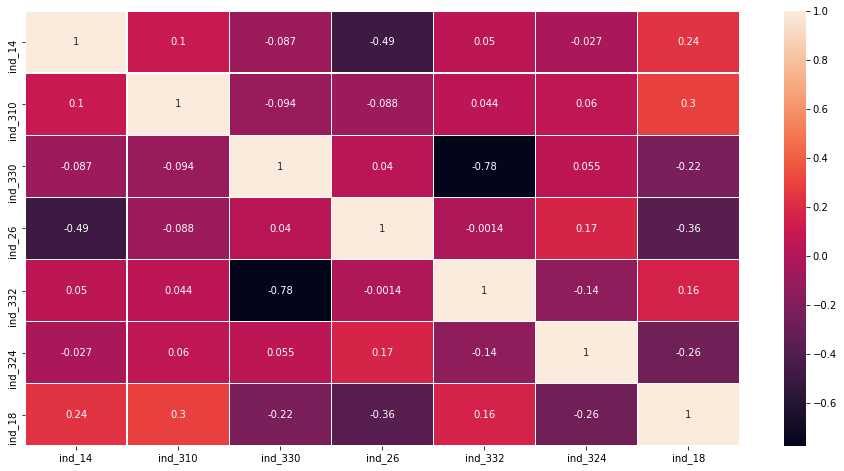

In [64]:
heatmap(data_corr.drop(["50_target"], axis=1))

In [65]:
print("Most Correlated\n",correlation_df(data_corr.drop(["50_target"],axis=1)).sort_values(by="Corr", ascending=False).head(5),"\n")
print("Less Correlated\n",correlation_df(data_corr.drop(["50_target"],axis=1)).sort_values(by="Corr", ascending=True).head(5),"\n")

Most Correlated
    feature1 feature2      Corr
15  ind_330  ind_332  0.775937
3    ind_14   ind_26  0.485883
21   ind_26   ind_18  0.361721
12  ind_310   ind_18  0.296947
26  ind_324   ind_18  0.257567 

Less Correlated
    feature1 feature2      Corr
19   ind_26  ind_332  0.001387
5    ind_14  ind_324  0.027027
14  ind_330   ind_26  0.039574
10  ind_310  ind_332  0.043902
4    ind_14  ind_332  0.049891 



### **4.2. Scatter Plot**

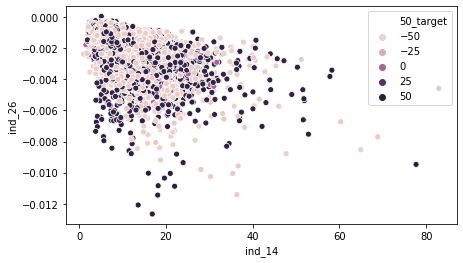

In [66]:
scatterplot("ind_14", "ind_26", "50_target", data)

### **4.3. Box Plot (Five Numbers Summary)**

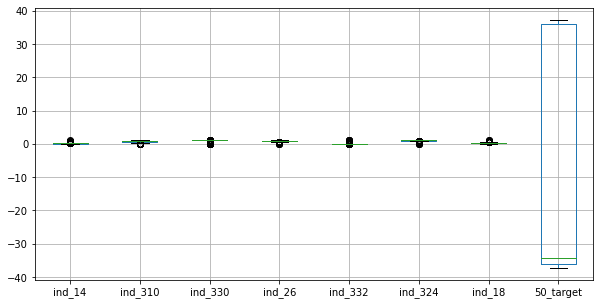

In [67]:
boxplot(data_corr)

### **4.4. Histogram (Distribution)**

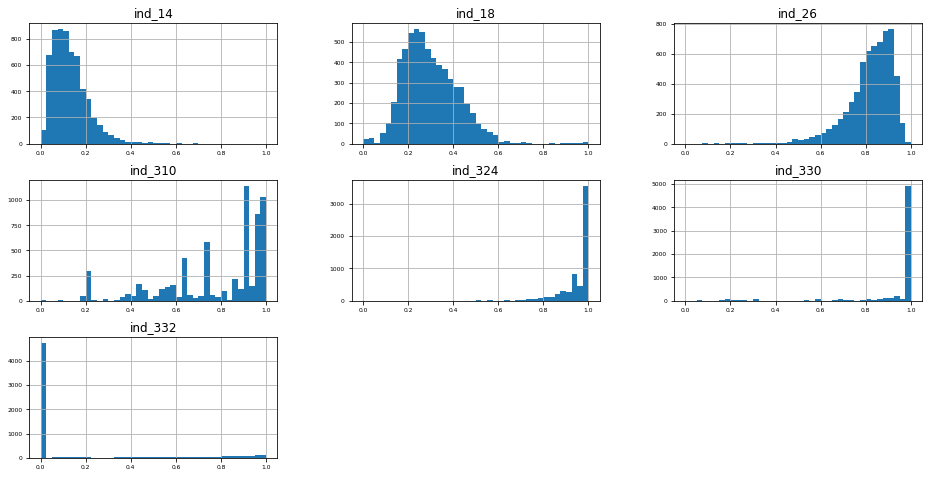

In [ ]:
histogram(data_corr.drop(["50_target"],axis=1), figsize=(16,8))

# **5. Modelling (Algorithms)**
- Decision Tree Regressor
- Random Forest Regressor
- Neural Network Regressor

## **5.1. DecisionTree Regressor**

### **5.1.1. PCA based FS**

In [87]:
x = data_pca.drop(["50_target"], axis=1)
y = data_pca["50_target"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

cart_model = DecisionTreeRegressor().fit(xtrain, ytrain)
y_pred = cart_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

MSE :  1425.1551961780685
RMSE:  37.75122774398296
MAE :  21.78450168270104


### **5.1.2. Correlation based FS**

In [88]:
x = data_corr.drop(["50_target"], axis=1)
y = data_corr["50_target"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

cart_model = DecisionTreeRegressor().fit(xtrain, ytrain)
y_pred = cart_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

MSE :  694.0144401033899
RMSE:  26.344153812627763
MAE :  10.687094341096518


#### **5.1.3. RandomForest based FS**

In [89]:
x = data_rf.drop(["50_target"], axis=1)
y = data_rf["50_target"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

cart_model = DecisionTreeRegressor().fit(xtrain, ytrain)
y_pred = cart_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

MSE :  483.55563219041903
RMSE:  21.98989841246246
MAE :  7.404381781847708


## **5.2. RandomForest Regressor**

#### **5.2.1. PCA based FS**

In [90]:
x = data_pca.drop(["50_target"], axis=1)
y = data_pca["50_target"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

cart_model = RandomForestRegressor().fit(xtrain, ytrain)
y_pred = cart_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

MSE :  728.1767809151571
RMSE:  26.984750895925593
MAE :  23.874350862713197


#### **5.2.2. Correlation based FS**

In [91]:
x = data_corr.drop(["50_target"], axis=1)
y = data_corr["50_target"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

cart_model = RandomForestRegressor().fit(xtrain, ytrain)
y_pred = cart_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

MSE :  386.6405558221318
RMSE:  19.66317766339235
MAE :  14.145942669104391


#### **5.2.3. RandomForest based FS**

In [92]:
x = data_rf.drop(["50_target"], axis=1)
y = data_rf["50_target"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

cart_model = RandomForestRegressor().fit(xtrain, ytrain)
y_pred = cart_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

MSE :  243.91044281897987
RMSE:  15.617632433214064
MAE :  9.636607299542193


## **5.3. NeuralNetwork Regressor**

### **5.3.1. PCA based FS**

In [93]:
x = data_pca.drop(["50_target"], axis=1)
y = data_pca["50_target"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

mlp_model = MLPRegressor().fit(xtrain, ytrain)
y_pred = mlp_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

MSE :  1043.692760487467
RMSE:  32.306234080862275
MAE :  29.54649837480838


#### **5.3.2. Correlation based FS**

In [94]:
x = data_corr.drop(["50_target"], axis=1)
y = data_corr["50_target"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

mlp_model = MLPRegressor().fit(xtrain, ytrain)
y_pred = mlp_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

MSE :  1169.2833873213983
RMSE:  34.194785966889725
MAE :  32.68596880476802


#### **5.3.3. RandomForest based FS**

In [95]:
x = data_rf.drop(["50_target"], axis=1)
y = data_rf["50_target"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

mlp_model = MLPRegressor().fit(xtrain, ytrain)
y_pred = mlp_model.predict(xtest)
evaluation_metrics(ytest, y_pred)

MSE :  1169.500737994956
RMSE:  34.1979639451672
MAE :  32.84223247543219


# **6. Model Tuning**

Burada ilk modelling'te en iyi sonucu veren feature selection algoritmasi kullanilarak tuning islemi gerceklestiriliyor.

In [96]:
x = data_rf.drop(["50_target"], axis=1)
y = data_rf["50_target"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((4625, 10), (1542, 10), (4625,), (1542,))

### **6.1. DecisionTree Regressor Tuning**

In [99]:
dt_params = {"min_samples_split": [2,3,4,5,7,10],
             "min_samples_leaf": [2,3,5,7,10,15,20],
             "max_leaf_nodes": [3,4,5,6,7,10]}

ytest, y_pred, model, best_param = DecisionTreeRegressorTuning(xtrain,ytrain, xtest, ytest, dt_params)
evaluation_metrics(ytest,y_pred)

Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed:   14.3s


MSE :  988.1385213596632
RMSE:  31.434670689537423
MAE :  27.750541812422913


[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:   34.4s finished


### **6.2. RandomForest Regressor Tuning**

In [102]:
rfr_params = {"max_depth": [2,3,5,6,7,8,9,10,12,15],
              "max_features": [2,3,4,5],
              "n_estimators": [10,20,30,50]}

ytest, y_pred, model, best_param = RandomForestRegressorTuning(xtrain,ytrain, xtest, ytest, rfr_params)
evaluation_metrics(ytest, y_pred)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1022 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1387 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:  4.1min finished


MSE :  253.23538068686457
RMSE:  15.91337112892377
MAE :  10.58813441634971


### **6.3. NeuralNetwork Regressor Tuning**

In [104]:
mlp_params = {"alpha": [0.1,0.01, 0.005],
             "hidden_layer_sizes": [(10,10), (10,10,10), (20,20), (30,20,10), (50,50)],
             "activation": ["relu", "logstics"],
              "solver": ["lbfgs", "adam","sgd"]}

ytest, y_pred, model, best_param = NeuralNetworkRegressorTuning(xtrain,ytrain, xtest, ytest, mlp_params)
evaluation_metrics(ytest, y_pred)Regressor

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 13.2min finished


MSE :  1090.565146380748
RMSE:  33.02370582446416
MAE :  30.76854313765482
